### Name: Batuhan Erdanuş
### ID: 070170460

# Part 1: Gradient Descent and Newton's Method (50 points)

In this part of the task you are expected to analyse 3 optimization methods (1) Vanilla Gradient Descent (2) Gradient Descent with Momentum and (3) Newton's method. Please only fill the specified areas and do not change other parts of the code in order to prevent any mistakes during evaluation.

## Part 1.1: Vanilla Gradient Descent vs. Gradient Descent with Momentum (25 points)

In Vanilla Gradient Descent (the standard gradient descent algorithm), the parameters are updated in the direction of negative gradient. In equation form: 
### <center> $ \textbf{w}^k =\textbf{w}^{k-1} - \alpha \nabla g(\textbf{w}^{k-1}) $ <center> 

However, this update rule causes oscillating, or "zig-zagging" in the direction of the gradient. In order to overcome this, one can use the exponential average of the past descent directions, which is called "momentum". This allows the gradients to change directions more smoothly and eliminates zig-zags, producing better results in optimization. The update rule in equation form:

### <center>$ \textbf{m}^{k-1} = \beta \textbf{m}^{k-2} + (\nabla g(\textbf{w}^{k-1})) $ <center>

### <center> $ \textbf{w}^k = \textbf{w}^{k-1} -  \textbf{m}^{k-1} \alpha$ <center>

### For more information regarding gradient descent with momentum,  <a href="https://distill.pub/2017/momentum/">go to this link </a>



Note that when "beta" is equal to 0, above update rule is the same as the one in Vanilla Gradient Descent.

### Part 1.1.1: Code Up Momentum Accelerated Gradient Descent (20 points)

In the below cell, code up the "momentum accelerated gradient descent" to find the "w" value that minimizes the quadratic function of the form: 
### <center> $ g(\textbf{w}) = \begin{bmatrix} 0.4 & 9 \end{bmatrix} \textbf{w}^2 + 0.25 \textbf{w}^T \textbf{w}+ sum(\textbf{w}) $ <center>

### Steps:
- Make three runs of the algorithm: one run of "Vanilla Gradient Descent" i.e make beta = 0, and two runs of "Momentum Accelerated Gradient Descent with two "beta" parameters between 0 and 1 of your choice. Try to choose beta values that gives different results to compare them later on.
- You need to define the initial w value randomly. The size of w vector is 2 x 1.
- Choose a proper learning rate / step size and use the same learning rate for each run.
- Maximum iteration number should be 30.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();
anime_plotter = optlib.animation_plotter.Visualizer();

np.random.seed(3)

In [170]:
def gradientDescentWithMomentum(g, grad_w, w_0=None, lr = None, beta = None, num_iter=30):
    '''
        g: cost function
        grad_w: derivative of g function wrt w
        lr: learning rate
        beta: momentum parameter [0,1]
        num_iter = number of iterations in gradient descent
    '''
    #Initialize variables
    
    m = 0 #Momentum term
    w_history = [] #List of w's in each iteration, used to plot

    ##### YOUR CODE STARTS HERE #####
    
    # (Don't forget to add w_0 to w_history list!)
    w = w_0
    
    w_history.append(w_0)
#    w_1 = w_0.copy()
#    w_history.append(tuple(w_1))
    
#    m_hist = []
#    m_hist.append(m)
#    m_hist.append(m)
    j = 0
    
    while j < num_iter:
        #calculate the gradient
        gradients = grad_w(w)
        m = beta*m + gradients

        w = w - lr*m
        
        w_history.append(w)
        j += 1
        
        
    
    #Then apply gradient descent with momentum steps as many time as num_iter
        
    #Add new w to list
    

    
    ##### YOUR CODE ENDS HERE #####
        
    return w, w_history

Gradient Descent w/ Momentum, Beta =0
Optimum weight vector found as: (-0.7572687916430781,-0.048620524289909595)
Minimum cost is found as: -0.4112763138296311


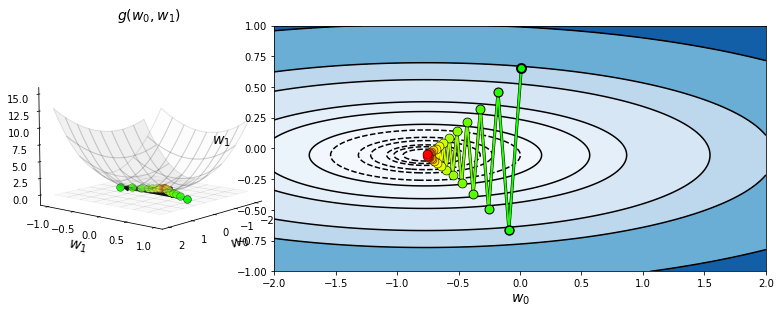

Gradient Descent w/ Momentum, Beta =0.3
Optimum weight vector found as: (-0.7684256059356485,-0.05405404475642084)
Minimum cost is found as: -0.41164199025525516


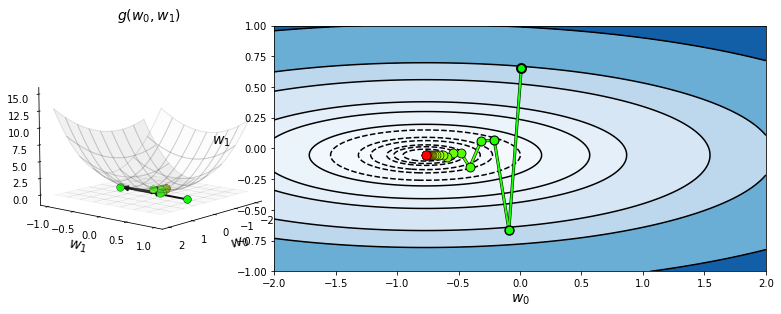

Gradient Descent w/ Momentum, Beta =0.7
Optimum weight vector found as: (-0.771669740410111,-0.04964426542189426)
Minimum cost is found as: -0.41145866738417475


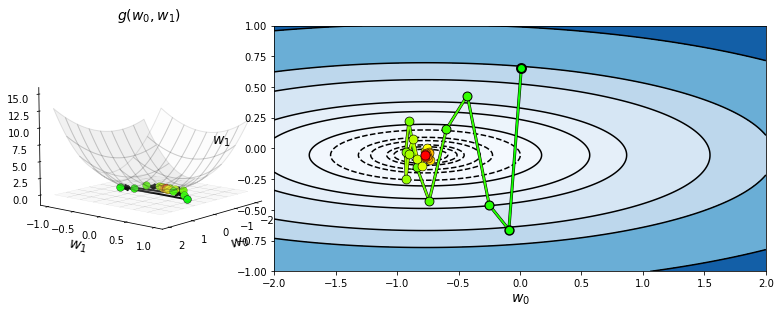

In [173]:
##### YOUR CODE STARTS HERE ###
g = lambda w: 0.65*w[0]**2 + 9.25*w[1]**2 + w[0]+w[1] # cost function
grad_w = lambda w: np.array([1+2*0.65*w[0],1+2*9.25*w[1]]) # gradient function

lr = 0.1 
betas = [0, 0.3, 0.7] #define your beta values 
w_0 = np.array([-2 + 4*np.random.rand(1),-1 + 2*np.random.rand(1)]) #initialize w with size 2 x 1
for beta in betas:
    
    w, w_history = gradientDescentWithMomentum(g, grad_w, w_0, lr, beta)
    print("Gradient Descent w/ Momentum, Beta =" + str(beta))
    print("Optimum weight vector found as: " + "(" + str(w[0][0])+","+str(w[1][0])+ ")")
    print("Minimum cost is found as: " + str(g(w_history[-1])[0]))
    
    ##### YOUR CODE ENDS HERE ###
    for i in range(len(w_history)):
        w_history[i] = np.squeeze(w_history[i])

    # show run in both three-dimensions and just the input space via the contour plot
    static_plotter.two_input_surface_contour_plot(g, w_history,num_contours = 30,view = [10,40], xmin=-2, xmax=2, ymin=-1, ymax=1)

### Part 1.1.2: Compare and interpret the results. (5 points)
**What is the difference between gradient descent with momentum and Vanilla Gradient Descent?
What is the effect of the beta parameter?
Discuss your results comparing these methods in terms of optimization process, speed and minimum cost results.**

* The difference between gradient descent with momentum and Vanilla Gradient Descent is. The former one aggregate additional momentum term into the Vanilla Gradient Descent algorithm with parameter beta. This is the exponential moving average of the past direction. 

* From the formula we can see that the larger the beta the more momentum we accumulate from the past. In other words, larger beta means higher speed moving towards the minimum. This is shown in the plot that, we need fewer steps to move to the similar position when beta = 0.3 compare to beta = 0, we are accelerating the process.

* If we have too large of the beta, beta = 0.7 for example, it moves too fast that result in overshoot. And thus have larger cost than beta = 0.3


## Part 1.2: Newton's Method (25 points)


Newton's method finds the local minima by moving towards to stationary points of second order Taylor series approximation, with the following update formula:
### <center> $\text{w}^k = \text{w}^{k-1} - (\nabla^2 g(\text{w}^{k-1}))^{-1} \nabla g(\text{w}^{k-1})$ <center>

However, as the dimension of $\text{w}$ increases linearly, computation of the Hessian matrix $\nabla^2 g(\text{w}^{k-1})$ and necessary amount of storage increases quadratically at best. The easiest ways to overcome this issue is to sub-sample the Hessian matrix, in which only some part of the Hessian is used in computation. One way of doing this is to only use the diagonal entries of the Hessian matrix. This way, instead of computing the $NxN$ Hessian matrix, only $N$ entries needed to be computed. Update formula is also simplified to a component-wise update: 

### <center> $ w_n^k = w_n^{k-1} - \frac{\frac{\partial}{\partial w_n}g(w^{k-1})}{\frac{\partial^2}{\partial w_n^2}g(w^{k-1})} $ <center>

for $n=1,2,3...N$.

### Part 1.2.1: Code up the sub-sampled Newton's Method (25 points)

Code up the "sub-sampled Newton's Method" in the relevant notebook cell by ignoring all off-diagonal elements of the Hessian, as explained above, to find the "$\text{w}$ that minimizes the same quadratic function of the form:
### <center> $ g(\textbf{w}) = 0.26(\textbf{w}^T\textbf{w}) + 0.48(sum(\textbf{w}))-cos(\textbf{w}^T\textbf{w})$ <center>

- Define the given function and gradients as necessary and optmize it using 2 methods (1) Newton's method and (2) Gradient descent with momentum. You can use the gradient descent function above and you are supposed to complete the Newton's method function below.
- You need to define the initial w value randomly. The size of w vector is 2 x 1.
- Choose a proper learning rate / step size for gradient descent function.
- Maximum iteration number should be 10 for both methods.

In [233]:
def NewtonsMethodwithSubSampling(g, grad_1st, grad_2nd, num_iter=10, w_0 = None):
    '''
        num_iter = number of iterations for Newton's Method
        w_0: initial w
    '''
    #Initialize variables
    w_history = [] #List of w's in each iteration, used to plot
    epsilon = 1e-6 # Add it to denominator to avoid division by zero
    
    ##### YOUR CODE STARTS HERE #####
    
    # Don't forget to add w_0 into history
    w_history.append(w_0)
    w = w_0
    # Implement the update rule for Newton's method
    j = 0
    while j < num_iter:
        w = w - grad_1st(w)/(grad_2nd(w)+epsilon)
        w_history.append(w)
        j += 1
    ##### YOUR CODE ENDS HERE #####
    
    return w, w_history



Gradient Descent w/ Momentum
Optimum weight vector: (-0.24616220115346987,-0.4504357866006586)
Minimum cost: -1.2313474402875024


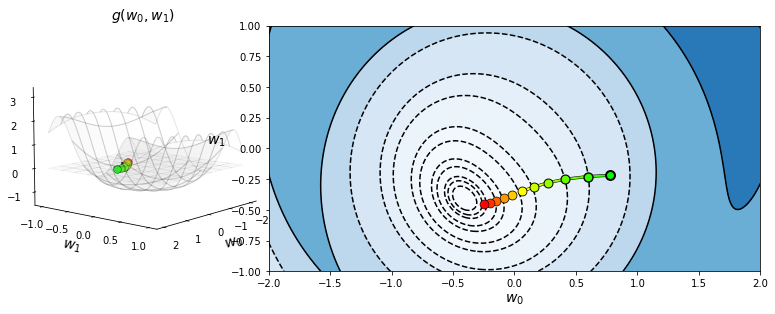

Newton's Method
Optimum weight vector: (-0.4084615639540582,-0.4084987245733281)
Minimum cost: -1.2502087657262742


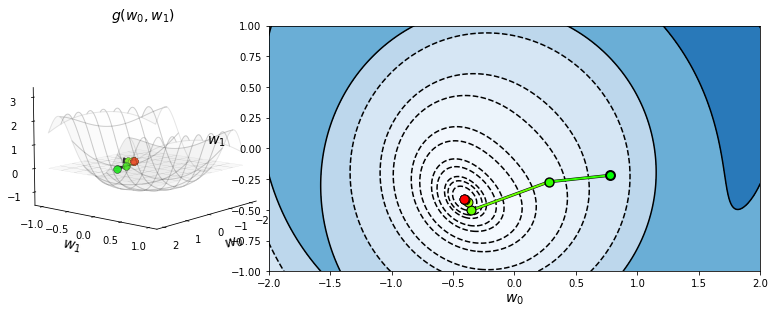

In [236]:
##### YOUR CODE STARTS HERE #####
g = lambda w: 0.26*(w[0]**2+w[1]**2) + 0.48*(w[0]+w[1]) - np.cos(w[0]**2+w[1]**2)
grad_w_1st = lambda w: np.array([2*0.26*w[0]+0.48+2*w[0]*np.sin(w[0]**2+w[1]**2),2*0.26*w[1]+0.48+2*w[1]*np.sin(w[0]**2+w[1]**2)])
grad_w_2nd = lambda w: np.array([2*0.26+(4*w[0]**2)*np.cos(w[0]**2+w[1]**2)+2*np.sin(w[0]**2+w[1]**2),
                                 2*0.26+(4*w[1]**2)*np.cos(w[0]**2+w[1]**2)+2*np.sin(w[0]**2+w[1]**2)])
lr = 0.1
w_0 = np.array([-2 + 4*np.random.rand(1),-1 + 2*np.random.rand(1)]) #initialize w 
   
# Call gradient descent and Newton's method functions 

w_grad, w_history_grad = gradientDescentWithMomentum(g, grad_w_1st, w_0, lr, beta=0.3,num_iter = 10)
w_newton, w_history_newton = NewtonsMethodwithSubSampling(g, grad_w_1st, grad_w_2nd, num_iter=10, w_0 = w_0)

print("Gradient Descent w/ Momentum")
print("Optimum weight vector: "+ "(" + str(w_grad[0][0])+","+str(w_grad[1][0])+ ")")
print("Minimum cost: " + str(g(w_history_grad[-1])[0]))

for i in range(len(w_history_grad)):
    w_history_grad[i] = np.squeeze(w_history_grad[i])
    w_history_newton[i] = np.squeeze(w_history_newton[i])

# show run in both three-dimensions and just the input space via the contour plot
static_plotter.two_input_surface_contour_plot(g, w_history_grad,num_contours = 30,view = [10,40], xmin=-2, xmax=2, ymin=-1, ymax=1)

print("Newton's Method")
print("Optimum weight vector: "+ "(" + str(w_newton[0][0])+","+str(w_newton[1][0])+ ")")
print("Minimum cost: "+ str(g(w_history_newton[-1])))

static_plotter.two_input_surface_contour_plot(g, w_history_newton,num_contours = 30,view = [10,40], xmin=-2, xmax=2, ymin=-1, ymax=1)

##### YOUR CODE ENDS HERE ###

#### Part 1.2.2: Compare and interpret the performances of both algorithms. (5 points)
__Which one of the approaches performed better (in terms of convergence speed and minimum result)? What do you think made the difference?__

* The Newton's method with subsampling perform better. First, it has smaller cost. Second, it is faster than Gradient descent with momentum as we can see from the plot.
* The reason for this could be we are using quadratic cost function, and the core mechanism of newton's method is repeatedly creating the second order Taylor series quadratic approximation to the cost function. So, it will be better dealing with quadratic cost function. Especially in our case, the second derivative is easy to compute. Also, gradient descent use only first derivative, when we are dealing with multidimensional problem, it will be less efficient than Newton's method because Newton's method take curvature of the function into account.

# Part 2: Least Squares Linear Regression (25 points)

### Background

Using the Least Squares cost, the aim in Linear Regression is to find the $b, \mathbf{w}$ values that minimize the following cost function:

$$
g(b, \mathbf{w})=\sum_{p=1}^{P}\left(b+\mathbf{x}_{p}^{T} \mathbf{w}-y_{p}\right)^{2}
$$

where $P$ is the number of data and $\mathbf{x}_{p}$ is the $p_{th}$ data in the dataset. Given the more compact notation: 

$$
\tilde{\mathbf{x}}_{p}=\left[\begin{array}{c}
1 \\
\mathbf{x}_{p}
\end{array}\right] \quad \tilde{\mathbf{w}}=\left[\begin{array}{l}
b \\
\mathbf{w}
\end{array}\right]
$$

gradient for the $b, \mathbf{w}$, or $\tilde{\mathbf{w}}$, can be calculated as follows(check blink videos for detailed derivation):

$$
\nabla g(\tilde{\mathbf{w}})=2 \sum_{p=1}^{P} \tilde{\mathbf{x}}_{p}\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}-y_{p}\right)=2\left(\sum_{p=1}^{P} \tilde{\mathbf{x}}_{p} \tilde{\mathbf{x}}_{p}^{T}\right) \tilde{\mathbf{w}}-2 \sum_{p=1}^{P} \tilde{\mathbf{x}}_{p} y_{p}
$$

Using the gradient, it is possible to perform gradient descent to minimize the Least squares cost. However, we can also solve the first order system directly to find the global minimum, withouth any iterative process by setting the gradient above to zero.

$$
\left(\sum_{p=1}^{P} \tilde{\mathbf{x}}_{p} \tilde{\mathbf{x}}_{p}^{T}\right) \tilde{\mathbf{w}}=\sum_{p=1}^{P} \tilde{\mathbf{x}}_{p} y_{p}
$$

Solving these equations with the assumption $\sum_{p=1}^{P} \tilde{\mathbf{x}}_{p} \tilde{\mathbf{x}}_{p}^{T}$ is invertible, we can calculate $\tilde{\mathbf{w}}$ as: 
$$
\tilde{\mathbf{w}}^{\star}=\left(\sum_{p=1}^{P} \tilde{\mathbf{x}}_{p} \tilde{\mathbf{x}}_{p}^{T}\right)^{-1} \sum_{p=1}^{P} \tilde{\mathbf{x}}_{p} y_{p}
$$





## To Do: Solve the associated Linear Regression Least Squares problem

Given the U.S. student loan debt data in the file "student_debt_data.csv", fit a linear model by solving the linear system of equations for the Least Squares regression fit and find the associated $w$ vector (Don't code up gradient descent). Calculate what the total student debt will be in 2050 according to the linear model you fit. 

Some of the functionalities are given to you below, such as plotting and loading data. You are also given the template function that you will fill in. 

In [176]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

Load up the dataset.

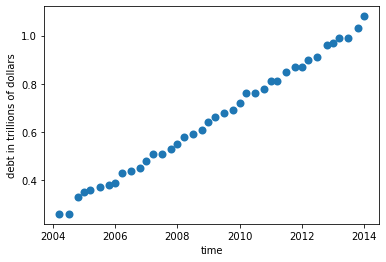

In [177]:
# import the dataset
data = np.asarray(pd.read_csv('student_debt_data.csv',header = None))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

#Plot data
plt.scatter(x,y,linewidth = 2)
plt.xlabel('time')
plt.ylabel('debt in trillions of dollars')
plt.show()

# pad input with ones
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)

Lets setup the linear system associated to minimizing the Least Squares cost function for this problem and solve it.

In [180]:
##### TO DO: YOUR CODE GOES HERE #####
# solve linear system of equations for regression fit
def linear_regression_solve_equation(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

w = linear_regression_solve_equation(x_new, y)        # weights learned by solving linear system

With our line fit to the data we can now predict total student debt in 2050.

In [181]:
# print out predicted amount of student debt in 2050
debt_in_2050 = w[0] + w[1]*2050
print ('if this linear trend continues there will be ' + str(debt_in_2050[0]) + ' trillion dollars in student debt in 2050!')

if this linear trend continues there will be 3.9360105642045937 trillion dollars in student debt in 2050!


Finally, lets print out the dataset and linear fit.

# Part 3: Gradient Descent for Logistic Regression (25 points)

### Background

In logistic regression, the aim is to minimize the "Least Squares cost" function, which is:

$g(b, w)=\sum_{p=1}^{P}\left(\sigma\left(b+\mathbf{x}_{p}^{T} \mathbf{w}\right)-y_{p}\right)^{2}$

where $\sigma$ is the sigmoid function, $\mathbf{x}_{p}=\left[\begin{array}{llll}x_{1, p} & x_{2, p} & \dots & x_{N, p}\end{array}\right]^{T}$ and $\mathbf{w}_{p}=\left[\begin{array}{llll}w_{1} & w_{2} & \dots & w_{N}\end{array}\right]^{T}$.

The gradient descent step with respect to above Least Squares cost function is then:

$\Delta g(\tilde{w})=2 \sum_{p=1}^{P}\left(\sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)-y_{p}\right) \sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)\left(1-\sigma\left(\tilde{x}_{p}^{T} \tilde{w}\right)\right) \tilde{x}_{p}$

where $$
\tilde{\mathbf{x}}_{p}=\left[\begin{array}{c}
1 \\
\mathbf{x}_{p}
\end{array}\right] \quad \tilde{\mathbf{w}}=\left[\begin{array}{c}
b \\
\mathbf{w}
\end{array}\right]
$$

This step can be written more compactly by denoting

$\begin{aligned} \sigma_{p}^{k-1} &=\sigma\left(\tilde{\mathbf{x}}_{p}^{T} \tilde{\mathbf{w}}^{k-1}\right) \\ r_{p}^{k-1} &=2\left(\sigma_{p}^{k-1}-y_{p}\right) \sigma_{p}^{k-1}\left(1-\sigma_{p}^{k-1}\right) \end{aligned}$

for all $p=1, \ldots, P$ and $\mathbf{r}^{k-1}=\left[\begin{array}{llll}r_{1}^{k-1} & r_{2}^{k-1} & \ldots & r_{P}^{k-1}\end{array}\right]^{T}$, and stacking the $\tilde{\mathbf{x}}_{p}$ column-wise into the matrix $\tilde{\mathbf{X}}$. Then the gradient can be written as:

$\Delta g\left(\tilde{\mathbf{w}}^{k-1}\right)=\tilde{\mathbf{X}} \mathbf{r}^{k-1}$

For programming languages like Python and MATLAB/OCTAVE that have especially efficient implementations of matrix/vector operations this can be much more efficient than explicitly summing over the P points. In other words, these steps are shown for programming simplicity on Python/Matlab like languages.

### Complete gradient descent function

In this exercise you will produce the gradient descent paths for the dataset "bacteria_data.csv". An example figure for the same process on a __"different"__ version of the dataset shown in the Figure below:

<img src="https://web.itu.edu.tr/kamard/Fig3_1_note.png" style="width: 600px;" />

The surface in this figure was generated via the wrapper below with the dataset $bacteria\_data.csv$, and inside the wrapper you must complete a short gradient descent function to produce the descent paths called

$[i n, o u t]=g r a d_{-} d e s c e n t\left(\tilde{\mathbf{X}}, \mathbf{y}, \tilde{\mathbf{w}}^{0}\right)$

where "in" and "out" contain the gradient steps $\tilde{\mathbf{w}}^{k}=\tilde{\mathbf{w}}^{k-1}-\alpha_{k} \nabla g\left(\tilde{\mathbf{w}}^{k-1}\right)$ taken corresponding objective value $g\left(\tilde{\mathbf{w}}^{k}\right)$ respectively, $\tilde{\mathbf{X}}$ is the input data matrix, $y$ the output values and $\tilde{\mathbf{w}}^{0}$ the initial point.

Almost all of this function has already been constructed for you. For example, the step length is fixed at $\alpha_{k}=10^{-2}$ for all iterations, etc., and you must only enter the gradient of the associated cost function. Pressing "run" in the editor will run gradient descent and will produce your figure.


Load data and plot.

In [189]:
# load the data
def load_data(csvname):
    data = np.asarray(pd.read_csv(csvname,header = None))
    x = data[:,0]
    x.shape = (np.size(x),1)
    temp = np.ones((np.size(x),1))
    X = np.concatenate((temp,x),1)
    y = data[:,1]
    y = y/y.max()
    y.shape = (np.size(y),1)
    return X,y

Functionality required for a proper gradient descent algorithm.

In [213]:
##### TO DO: YOUR CODE GOES HERE - COMPLETE THE GRADIENT DESCENT CODE #####
# run gradient descent
def gradient_descent(X,y,w0):
    w_path = []                 # container for weights learned at each iteration
    cost_path = []              # container for associated objective values at each iteration
    w_path.append(w0)
    cost = compute_cost(w0)
    cost_path.append(cost)
    w = w0

    # start gradient descent loop
    max_its = 5000
    alpha = 10**(-2)
    for k in range(max_its):
        # compute gradient
        sigma = 1/(1 + my_exp(-np.dot(X,w)))
        r = 2 * (sigma - y) * (sigma) * (1-sigma)
        grad = X.T.dot(r)
        # take gradient step
        w = w - alpha*grad

        # update path containers
        w_path.append(w)
        cost = compute_cost(w)
        cost_path.append(cost)

    # reshape containers for use in plotting in 3d
    w_path = np.asarray(w_path)
    w_path.shape = (np.shape(w_path)[0],np.shape(w_path)[1])
    return w_path,cost_path

# calculate the cost value for a given input weight w
def compute_cost(w):
    temp = 1/(1 + my_exp(-np.dot(X,w))) - y
    temp = np.dot(temp.T,temp)
    return temp[0][0]

def my_exp(u):
    s = np.argwhere(u > 100)
    t = np.argwhere(u < -100)
    u[s] = 0
    u[t] = 0
    u = np.exp(u)
    u[t] = 1
    return u

Plotting functions necessary to producing the data, fit, cost surface, and descent points.

In [214]:
# used by plot_logistic_surface to make objective surface of logistic regression cost function
def add_layer(a,b,c):
    a.shape = (2,1)
    b.shape = (1,1)
    z = my_exp(-np.dot(c,a))
    z = 1/(1 + z) - b
    z = z**2
    return z

# plot fit to data and corresponding gradient descent path onto the logistic regression objective surface
def show_fit(w_path,ax,col):
    # plot solution of gradient descent fit to original data
    s = np.linspace(0,25,100)
    t = 1/(1 + my_exp(-(w_path[-1][0] + w_path[-1][1]*s)))
    ax.plot(s,t,color = col)

# plot gradient descent paths on cost surface
def show_paths(w_path,cost_path,ax,col):           
    # plot grad descent path onto surface
    ax.plot(w_path[:,0],w_path[:,1],cost_path,color = col,linewidth = 5)   # add a little to output path so its visible on top of the surface plot
    
# plot logistic regression surface
def plot_surface(ax):
    # plot logistic regression surface
    r = np.linspace(-3,3,100)
    s,t = np.meshgrid(r, r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    # build 3d surface
    surf = np.zeros((np.size(s),1))
    max_its = np.size(y)
    for i in range(0,max_its):
        surf = surf + add_layer(X[i,:],y[i],h)

    # reshape 
    s = np.reshape(s,(100,100))
    t = np.reshape(t,(100,100))
    surf = np.reshape(surf,(100,100))

    # plot 3d surface
    ax.plot_surface(s,t,surf,cmap = 'jet')
    ax.azim = 175
    ax.elev = 20
    
# plot points
def plot_points(X,y,ax):
    ax.plot(X[:,1],y,'ko')

Now that everything is defined we can run all.

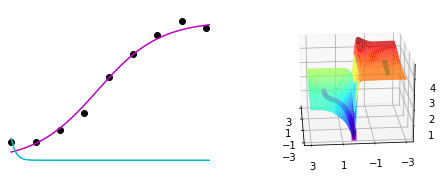

In [215]:
# load dataset
X,y = load_data('bacteria_data.csv') # load in data

# initialize figure, plot data, and dress up panels with axes labels etc.,
fig = plt.figure(facecolor = 'white',figsize = (8,3))
ax1 = fig.add_subplot(121)
ax1.set_xlim(min(X[:,1])-0.5, max(X[:,1])+0.5)
ax1.set_ylim(min(y)-0.2,max(y)+0.1)
ax1.axis('off')

ax2 = fig.add_subplot(122, projection='3d')
ax2.xaxis.set_rotate_label(False)
ax2.yaxis.set_rotate_label(False)
ax2.zaxis.set_rotate_label(False)
ax2.get_xaxis().set_ticks([-3,-1,1,3])
ax2.get_yaxis().set_ticks([-3,-1,1,3])
# ax2.axis('off')

### run gradient descent with first initial point
w0 = np.array([0,2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot points
plot_points(X,y,ax1)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'m')
show_paths(w_path,cost_path,ax2,'m')

### run gradient descent with first initial point
w0 = np.array([0,-2])
w0.shape = (2,1)
w_path, cost_path = gradient_descent(X,y,w0)

# plot fit to data and path on objective surface
show_fit(w_path,ax1,'c')
show_paths(w_path,cost_path,ax2,'c')
plot_surface(ax2)
plt.show()